#### 1.Loading scColon and reference Normal dataset

In [3]:
# Read the reference scRNA data
###
scReference.V1 <- readRDS("/data8t_4/JH/MyJobs/Normal_cell_reference/Step2_Merge_and_Filter_the_scReference/2019_11_16_scReference.V1.rds")
scReference.list <- scReference.V1$scReference.list
scReference.list.CV.8000 <- scReference.V1$scReference.list.CV.8000
scReference.list.CV.4000 <- scReference.V1$scReference.list.CV.4000
scReference.list.CV.2000 <- scReference.V1$scReference.list.CV.2000
scReference.list.CV.1000 <- scReference.V1$scReference.list.CV.1000
#### Read scRNA colon cancer
### 1.Tang colon cancer
Tang_scColon_dataset <- readRDS("/data8t_4/JH/MyJobs/Read_dataset/Tang_scColon_cancer_dataset/Tang_scColon_dataset.rds")
Tang.colon.cancer.FPKM.500 <- Tang_scColon_dataset$FPKM.500.exp
Tang.colon.cancer.TPM.688 <- Tang_scColon_dataset$TPM.688.exp
Tang.colon.cancer.FPKM.500.pheno <- Tang_scColon_dataset$FPKM.500.pheno
Tang.colon.cancer.TPM.688.pheno <- Tang_scColon_dataset$TPM.688.pheno
### 2.RCA colon cancer
RCA_epithelial_COUNT_normal_uniGene_dataset <- readRDS("/data8t_4/JH/MyJobs/Read_dataset/GSE81861_RCA_colorectal_tumors/RCA_epithelial_COUNT_normal_uniGene_dataset.rds")
NM.epithelial.COUNT.normal.uniGene <- RCA_epithelial_COUNT_normal_uniGene_dataset$NM.epithelial.COUNT.normal.uniGene
Tumor.epithelial.COUNT.normal.uniGene <- RCA_epithelial_COUNT_normal_uniGene_dataset$Tumor.epithelial.COUNT.normal.uniGene
NM.Epi.phenoType <- RCA_epithelial_COUNT_normal_uniGene_dataset$NM.Epi.phenoType
Tumor.Epi.phenoType <- RCA_epithelial_COUNT_normal_uniGene_dataset$tumor.Epi.phenoType

## convert dgCMatrix to dataframe
#NM.epithelial.COUNT.normal.uniGene <- as.data.frame(as.matrix(NM.epithelial.COUNT.normal.uniGene)) 
#Tumor.epithelial.COUNT.normal.uniGene <- as.data.frame(as.matrix(Tumor.epithelial.COUNT.normal.uniGene)) 

### 3.Colon organoid
Colon_Orgnoid_uniGene_dataset <- readRDS("/data8t_4/JH/MyJobs/Read_dataset/3D_organoid/3D_Organoid/Colon_Orgnoid_uniGene_dataset.rds")
Orgnoid_expression.uniGene.TPM <- Colon_Orgnoid_uniGene_dataset$Orgnoid_expression.uniGene.TPM
Orgnoid.colon.AUC.IC50 <- Colon_Orgnoid_uniGene_dataset$Drug_AUC_IC50


#### 2.Distance calculation of scColon and refernce panel
The expression data not transformed or filtered

In [4]:
#### Correlation of scColon cancer with Normal cancer
source("/data8t_4/JH/MyJobs/1_R_script/RCA_seperate_fuction.R")
source("/data8t_4/JH/MyJobs/1_R_script/refCor.R")
#### 1.Correlation of cancer cells with unfiltered scReference.V1
Cor.Tang.colon.cancer.FPKM.500 <- refCor(Tang.colon.cancer.FPKM.500, scReference.V1[["scReference.list"]])
Cor.Tang.colon.cancer.TPM.688 <- refCor(Tang.colon.cancer.TPM.688, scReference.V1[["scReference.list"]])
Cor.RCA.NM.epithelial.COUNT.normal <- refCor(NM.epithelial.COUNT.normal.uniGene, scReference.V1[["scReference.list"]])
Cor.RCA.Tumor.epithelial.COUNT.normal <- refCor(Tumor.epithelial.COUNT.normal.uniGene, scReference.V1[["scReference.list"]])
Cor.Orgnoid.colon.TPM <- refCor(Orgnoid_expression.uniGene.TPM, scReference.V1[["scReference.list"]])

#### 2.Merge to one table to analysis
Cor.merged<- cbind(Cor.Tang.colon.cancer.FPKM.500,
      Cor.Tang.colon.cancer.TPM.688,
      Cor.RCA.NM.epithelial.COUNT.normal,
      Cor.RCA.Tumor.epithelial.COUNT.normal)

In [5]:
#### 3.Build the sample phenoType infor
Pheno.merged <- as.data.frame(colnames(Cor.merged))
colnames(Pheno.merged) <- "Cell_names"
rownames(Pheno.merged) <- Pheno.merged$Cell_names
Pheno.merged$Cell_info <- c(rep("Cor.Tang.colon.cancer.FPKM.500", ncol(Cor.Tang.colon.cancer.FPKM.500)),
                            rep("Cor.Tang.colon.cancer.TPM.688", ncol(Cor.Tang.colon.cancer.TPM.688)),
                            rep("Cor.RCA.NM.epithelial.COUNT.normal", ncol(Cor.RCA.NM.epithelial.COUNT.normal)),
                            rep("Cor.RCA.Tumor.epithelial.COUNT.normal", ncol(Cor.RCA.Tumor.epithelial.COUNT.normal)))




#### 3.Projection analysis


Loading required package: flashClust

Attaching package: ‘flashClust’

The following object is masked from ‘package:stats’:

    hclust

Loading required package: WGCNA
Loading required package: dynamicTreeCut
Loading required package: fastcluster

Attaching package: ‘fastcluster’

The following object is masked from ‘package:flashClust’:

    hclust

The following object is masked from ‘package:stats’:

    hclust



Attaching package: ‘WGCNA’

The following object is masked from ‘package:stats’:

    cor



 ..cutHeight not given, setting it to 1.12  ===>  99% of the (truncated) height range in dendro.
 ..done.


Loading required package: gplots

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



ERROR: Error in plot.new(): figure margins too large


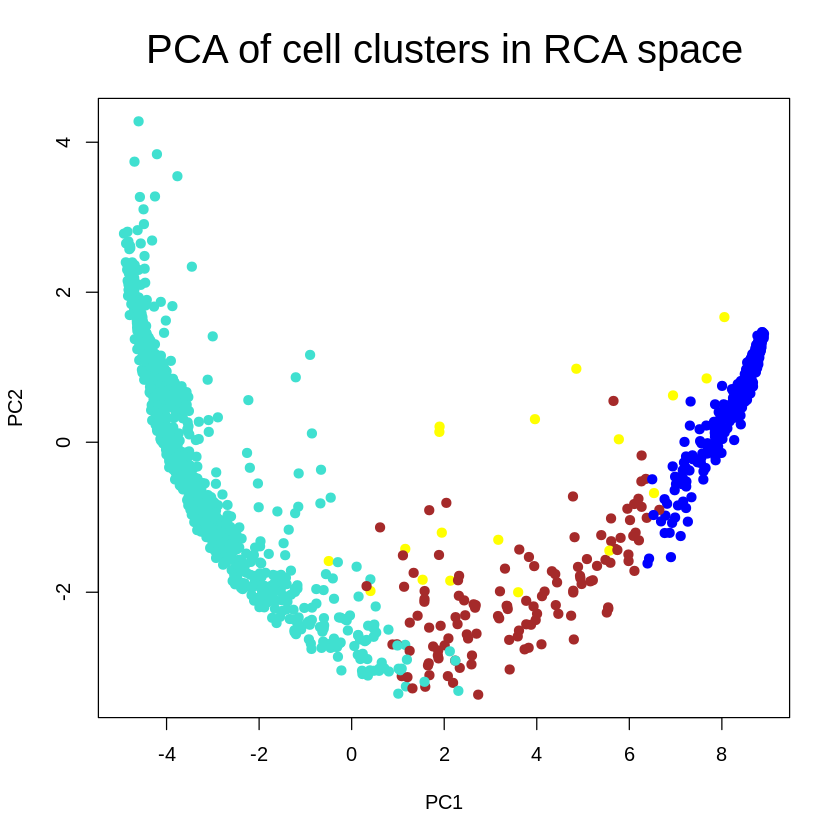

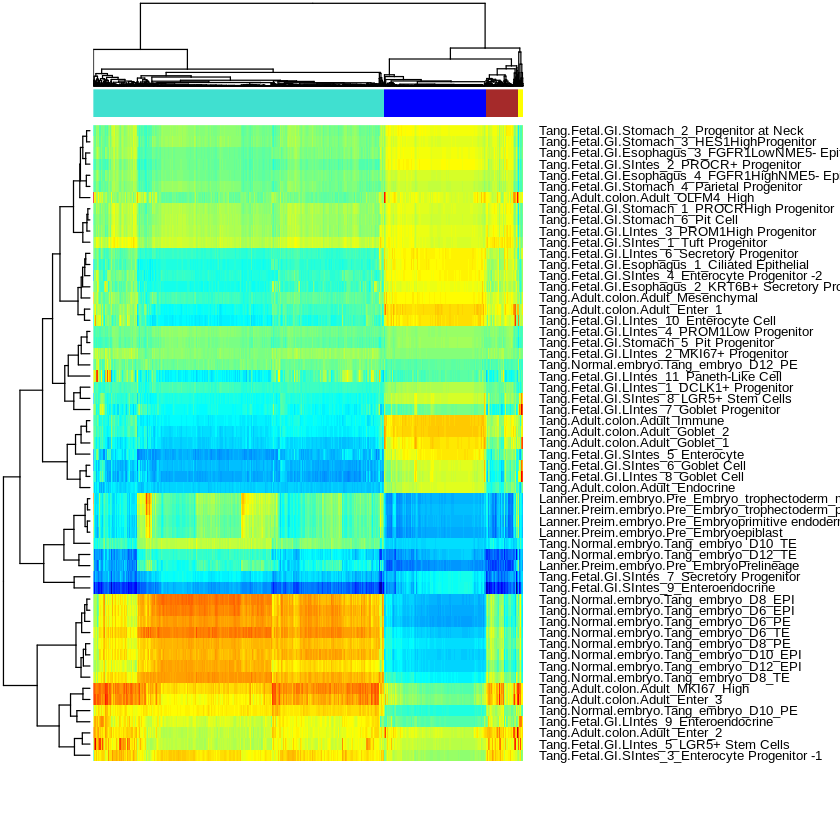

In [4]:
#### Using RCA analysis first
#### Merge data analysis
source("/data8t_4/JH/MyJobs/1_R_script/RCA/RCA_seperate_fuction.R")
test1 <- RCA.cluster(Cor.merged)
test2 <- RCA.PCA(Cor.merged, test1[[2]]$dynamicColors)
test3 <- RCA.heatmap(Cor.merged,test1[[1]], test1[[2]]$dynamicColors)

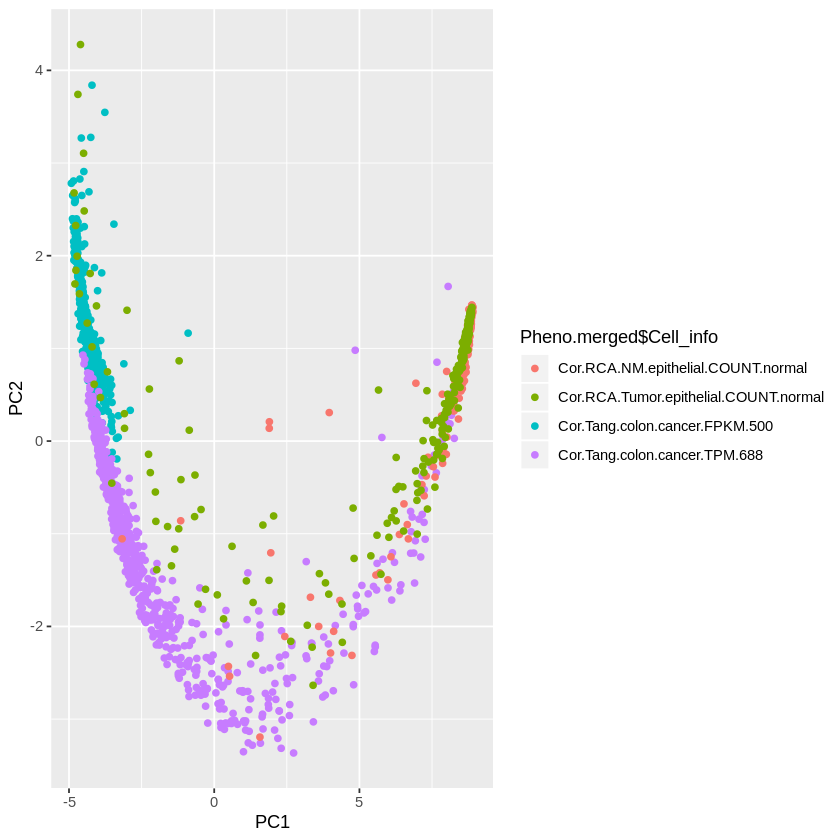

In [8]:
####
#### PCA ggplot2
#Cor.merged.transform = abs(Cor.merged)^power * sign(Cor.merged)


pca <- prcomp(t(scale(Cor.merged))); 

#pca$rotation # feartures contribution to each PCs
#pca$x        # samples position on that direction PCs
#pca$sdev     # sd of samples on the PCs direction
pca_out <- as.data.frame(pca$x)
#row.names(pca_out) <- gsub("_scTrioSeq2Rna_scTrioSeq2Rna_", "_scTrioSeq2Rna_", row.names(pca_out))
#pca_out$cellType <- sapply(strsplit(as.character(row.names(pca_out)), "_"), "[[", 4 )
#pca_out$pateint <- sapply(strsplit(as.character(row.names(pca_out)), "_"), "[[", 3 )

library(ggplot2)
p<-ggplot(pca_out,aes(x=PC1,y=PC2,color = Pheno.merged$Cell_info ))
p<-p+geom_point()
p
#pc_projection = as.data.frame(pr$x);
#cell_projection = pc_projection[,1:2];

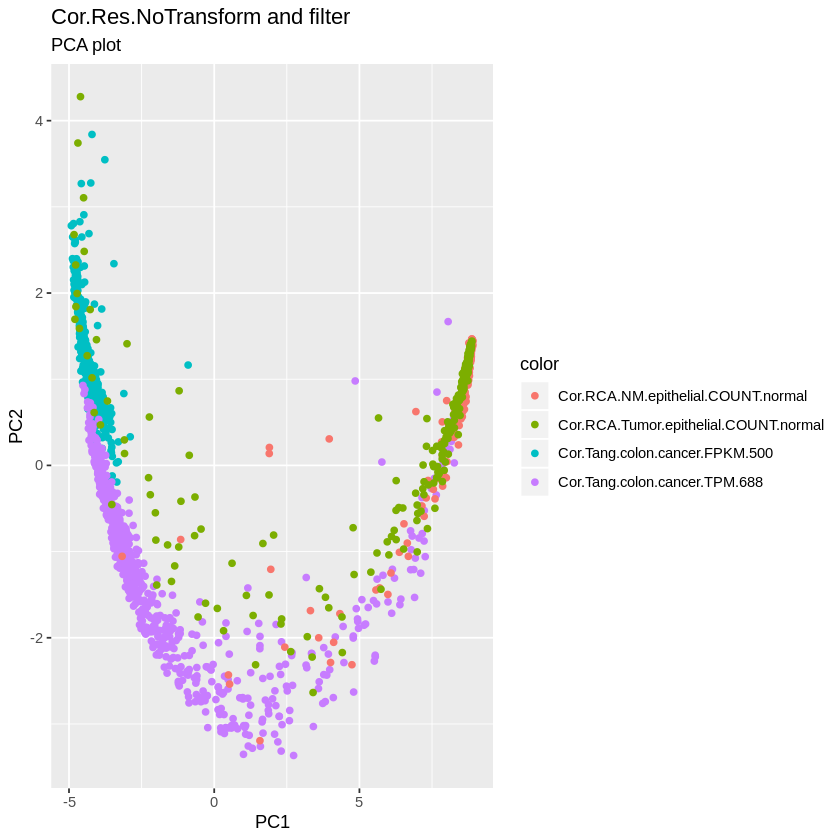

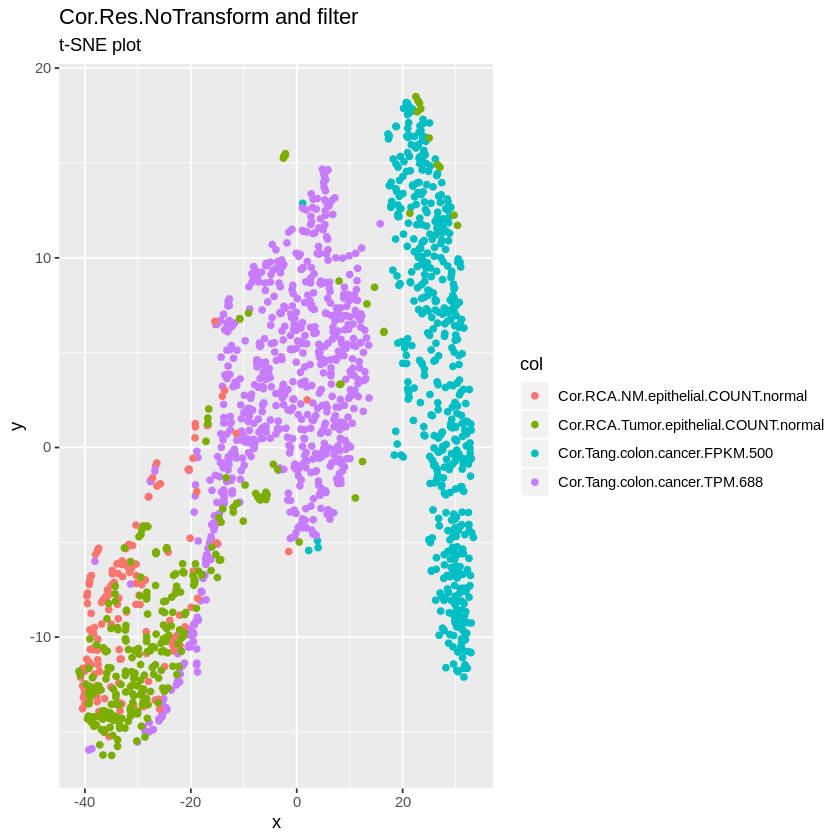

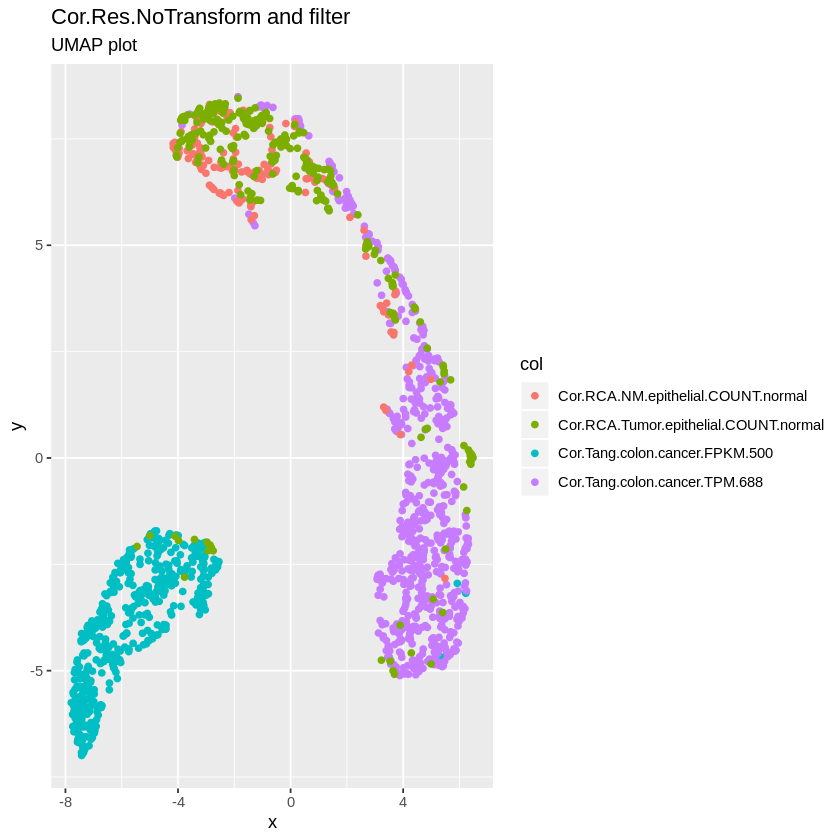

In [10]:
source("/data8t_4/JH/MyJobs/1_R_script/R_Plot/DimeReduPlot.R")
DimeReduPlot(mx = scale(Cor.merged), color = Pheno.merged$Cell_info, 
             tiltle = "Cor.Res.NoTransform and filter", print = T)